In [16]:
import re # 정규식을 표현 및 사용하기 위한 라이브러리 호출
from konlpy.tag import Twitter  # konlpy 사용을 위한 라이브러리 호출
from collections import Counter # dict 확장 데이터를 사용하기 위한 라이브러리 호출
import matplotlib.pyplot as plt # 그래프 사용을 위한 라이브러리 호출
import matplotlib # matplotlib 라이브러리 호출 
from matplotlib import font_manager,rc # 폰트매니저 사용을 위해 호출
from lxml import html # lxml을 이용하기 위해 html을 임폴트한다. 
from bs4 import BeautifulSoup  # HTML 파싱을 위한 라이브러리 호출
import time # 시간 값을 사용하기 위한 라이브러리 호출
import pandas as pd # 판다스 사용을 위한 라이브러리 호출
import sys # 파이썬 인터프리가 제공하는 변수들과 함수들을 직접 제어할수 있게 해주는 모델이다. 
import urllib.request # url 사용을 위한 라이브러리 호출
from urllib.parse import quote # URL을 파씽하기 위해서 사용한다. 

In [2]:
TARGET_URL_BEFORE_PAGE_NUM = "http://news.donga.com/search?p="
TARGET_URL_BEFORE_KEYWORD = '&query='
TARGET_URL_REST = '&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1'
# 동아닷컴에서 검색하기 위한 Url을 3단계로 나눠서 작성한다. 
# 먼저 new를 찾는 url
# 다음으로 어떤 키워드를 찾을 것 인지 
# 마지막으로 어떤 키워드에 해당하는 정렬(날짜별, 순서별)하여 찾기위한 url

In [3]:
def get_link_from_news_title(page_num, URL,output_file):
# get_link_from_news_title이라는 함수를 정의한다.(페이지수, url, 출력파일) 
    for i in range(page_num):
    # for문을 돌려서 순차적으로 확인한다.
        current_page_num = 1 + i*15
        # current_page_num은 페이지당 15개의 게시물을 검색한다.        
        position = URL.index('=')
        # position은 URL 처음 ‘=’ 오는 위치 반환한다. (URL에 몇페이지 인지 추가하기 위해)        
        URL_with_page_num = URL[: position+1] + str(current_page_num) \
                            + URL[position+1 :]
        # URL_with_page_num은 페이지에 있는 URL을 재구성한다.     
        source_code_from_URL=urllib.request.urlopen(URL_with_page_num)
        # 재구성한 URL을 request로 호출한다.        
        soup=BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='UTF-8')
        # soup는 BeautifulSoup로 변환한다. 
        # BeautifulSoup를 이용하여 기사를 추출하여 분석한다.
        
        for title in soup.find_all('p'):
            title_link = title.select('a')
            article_URL = title_link[0]['href']
            get_text(article_URL, output_file)
        # 본문 기사가 담긴 URL을 찾기위해서 for문을 돌려서 soup에 경로에서 p -> a.href로 된 내용들을 text에 저장한다.

In [4]:
def get_text(URL, output_file):
    source_code_from_url = urllib.request.urlopen(URL)
    soup = BeautifulSoup(source_code_from_url, 'lxml', from_encoding='UTF-8')
    # BeautifulSoup로 페이지를 분석하기위해 soup변수로 할당 받습니다.
    content_of_article = soup.select('div.article_txt')
    for item in content_of_article:
        string_item = str(item.find_all(text=True))
        output_file.write(string_item)
    # 기사 페이지를 요청받아서 기사의 본문 내용을 추출한다.

In [5]:
def main():
    keyword = "러시아월드컵" 
    #키워드는 검색하고 하는 단어를 검색한다. 김정은을 제외하고 나머지는 위와 동일한 코드를 이용하였다.
    # 월드컵
    # 러시아월드컵 전
    # 러시아월드컵 
    # 러시아월드컵 후 
    page_num = 50         #기사를 가져올 페이지 수를 나타낸다,
    output_file_name = "러시아월드컵.txt" #해당 기사를 출력할 파일명을 나타낸다.
    # 월드컵.txt
    # 러시아월드컵 전.txt
    #러시아월드컵.txt
    #러시아월드컵 후.txt
    
    target_URL = TARGET_URL_BEFORE_PAGE_NUM + TARGET_URL_BEFORE_KEYWORD \
                 + quote(keyword) + TARGET_URL_REST
    output_file = open(output_file_name, 'w', -1,"utf-8")
    get_link_from_news_title(page_num, target_URL, output_file)
    output_file.close()
    #해당 키워드에 대한 내용을 토대로 URL에서 해당 검색할 기사들을 토대로 txt파일로 추출해준다. 
    #txt파일의 경우에는 utf-8과 쓰기권한을 부여한다.


In [6]:
if __name__ == '__main__':
    main()
# name은 현재 모듈의 이름을 담고있는 내장변수이다. 
# 위의 코드의 경우 스크립트가 직접 실행되는지 혹은 import되어 실행되는지를 main함수에 대해서 알수있다.  

ValueError: unknown url type: ''

In [7]:
import re
INPUT_FILE_NAME = '러시아월드컵.txt'
    # 월드컵
    # 러시아월드컵 전
    # 러시아월드컵 
    # 러시아월드컵 후 
OUTPUT_FILE_NAME = '러시아월드컵(문장).txt'
    # 월드컵
    # 러시아월드컵 전
    # 러시아월드컵 
    # 러시아월드컵 후 

In [8]:
def clean_text(text):
    cleaned_text = re.sub('[a-zA-Z]' , '', text)
    cleaned_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]',
                          '', cleaned_text)
    return cleaned_text
# clean_text라는 함수를 정의한다.
# clean_text라는 함수에는 글자를 제외하고 영문/특수문자/공백 등등을 제거한다. 

In [9]:
def main():
    read_file = open(INPUT_FILE_NAME, 'r', encoding = 'utf-8')
    write_file = open(OUTPUT_FILE_NAME, 'w', encoding = 'utf-8')
    text = read_file.read()
    text = clean_text(text)
    write_file.write(text)
    read_file.close()
    write_file.close() 
# 입력 파일과 출력 파일은 utf-8, 입력 파일의 경우 읽기권한, 출력 파일의 경우 쓰기권한을 부여해준다. 
# 이전에 입력한 파일의 경우에는 문자/공백/특수기호와 같이 정리 안된 문서를 문장들만 남도록 정리해준다. 

In [10]:
if __name__ == "__main__":
    main()
# name은 현재 모듈의 이름을 담고있는 내장변수이다. 
# 위의 코드의 경우 스크립트가 직접 실행되는지 혹은 import되어 실행되는지를 main함수에 대해서 알수있다.  

In [11]:
def get_tags(text, ntags=50):
    spliter = Twitter()
    # spliter는 konlpy의 Twitter객체이다.
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출한다.
    count = Counter(nouns)
    # coun는 Counter객체를 생성하고 참조변수 nouns할당해준다.
    return_list = []  # return_list는 명사 빈도수 저장할 변수, 그리고 배열을 가지고 있다. 
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수가 큰 명사부터 순서대로 입력받은 정수 개수만큼 저장되어있는 객체 반환
    # 명사와 사용된 개수를 return_list에 저장합니다.
    return return_list 
# 즉 명사 추출하기 위한 코드이다. 

In [12]:
def main():
    text_file_name = "러시아월드컵(문장).txt"
    #남북정상회담
    #북한
    #통일
    # 분석할 파일을 입력한다. 이 경우도 나머지의 파일들도 해당 코드로 동일하게 수행한다. 
    noun_count = 1000
    # 최대 많은 빈도수 부터 1000개 명사를 추출한다.
    output_file_name = "러시아월드컵(분석됨).txt"
    # 명사 추출후 출력되는 txt파일 이름을 정의한다. 
    # count.txt 에 저장
    open_text_file = open(text_file_name, 'r',-1, encoding = "utf-8")
    text = open_text_file.read() 
    tags = get_tags(text, noun_count)
    open_text_file.close()   
    open_output_file = open(output_file_name, 'w',-1, encoding = "utf-8")
    # 분석할 파일을 열어서 해당 파일의 내용들을 명사로 추출한다. 
     
    for tag in tags:
        noun = tag['tag']
        count = tag['count']
        open_output_file.write('{} {}\n'.format(noun, count))
    # 추출된 명사들의 빈도를 나타내고 가장 빈도수가 높은 순서대로 나열한 후 결과를 저장한다.
    open_output_file.close() 
# 명사 추출 후 txt파일로 만드는 코드이다. 

In [13]:
if __name__=="__main__":
    main()
# 위의 코드의 경우 스크립트가 직접 실행되는지 혹은 import되어 실행되는지를 main함수에 대해서 알수있다.  

In [2]:
import pandas as pd #pandas(dataframe)을 이용하기위한 라이브러리를 임폴트한다.
from pandas import DataFrame # pandas에서 Dataframe을 이용하기위해 정의한다.
import numpy as np # numpy는 과학 계산을 위한 라이브러리로 다차원 배열을 처리하는데 필요한 여러 유용한 기능을 제공한다. 
import matplotlib.pyplot as plt # 그래프를 그리기 위한 라이브러리를 임폴트한다. 

In [9]:
world = pd.read_csv('월드컵(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')
R_worldB = pd.read_csv('러시아월드컵 전(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')
R_world = pd.read_csv('러시아월드컵(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')
R_worldA = pd.read_csv('러시아월드컵 후(분석됨).txt', names=['키워드','빈도수'], sep=" ", encoding='utf-8', engine='python')
# 해당 추출된 txt파일을 불러와서 해당 변수들에 입력한다. 
# 입력시 컬럼은 키워드, 빈도수로 입력하고 utf-8이며 공백구분은 “ ”으로 엔진은 파이썬을 이용한다. 

In [10]:
world = world.set_index('키워드')
R_worldB = R_worldB.set_index('키워드')
R_world = R_world.set_index('키워드')
R_worldA = R_worldA.set_index('키워드')

In [81]:
R_worldA

러시아월드컵_후_빈도수
키워드                 
한국               178
경기               164
첫                112
월드컵               98
기사                92
스웨덴               88
러시아               74
년                 66
시간                62
추천                60
페널티킥              58
선수                56
니즈                54
분                 54
메시                54
후                 50
축구                46
그                 46
전                 44
일                 42
것                 40
후반                38
아이슬란드             38
동아닷컴              36
기록                36
무승부               36
뉴스                36
감독                36
판독                34
러시아월드컵            34
기성용               34
승                 34
모두                34
멕시코               34
독일                34
비디오               32
조                 32
이                 32
관련                32
충격                32
튀니지               32
정상                32
뭐                 32
하루                32
월급                32
비스트               30
상황                30
케인                30
장골                30
잉글랜드              30

In [11]:
world = world.rename(columns={'빈도수':'월드컵_빈도수'})
R_worldB = R_worldB.rename(columns={'빈도수':'러시아월드컵_전_빈도수'})
R_world = R_world.rename(columns={'빈도수':'러시아월드컵_빈도수'})
R_worldA = R_worldA.rename(columns={'빈도수':'러시아월드컵_후_빈도수'})

In [12]:
world=world.head(50)
R_worldB=R_worldB.head(50)
R_world=R_world.head(50)
R_worldA=R_worldA.head(50)

In [13]:
world.to_csv('월드컵.csv',encoding="cp949", mode="w",index=True)
R_worldB.to_csv('러시아월드컵_전.csv',encoding="cp949", mode="w",index=True)
R_world.to_csv('러시아월드컵.csv',encoding="cp949", mode="w",index=True)
R_worldA.to_csv('러시아월드컵_후.csv',encoding="cp949", mode="w",index=True)

In [14]:
sum1 = pd.merge(world, R_worldB, how="inner",left_index=True,right_index=True)
sum2 = pd.merge(sum1, R_world, how="inner",left_index=True,right_index=True)
sum3 = pd.merge(sum2, R_worldA, how="inner",left_index=True,right_index=True)
sum3 = sum3.fillna(0)
sum3[:]

월드컵_빈도수  러시아월드컵_전_빈도수  러시아월드컵_빈도수  러시아월드컵_후_빈도수
키워드                                                 
월드컵      151           132         126            98
경기       104           176         188           164
축구        85            66          74            46
스웨덴       85           152         214            88
러시아       80            62          72            74
한국        78           166         184           178
전         72            72         138            44
기사        70            96          36            92
독일        65            42          68            34
년         65            88          58            66
시간        64            42          40            62
일         61            42          58            42
추천        58            60          60            60
멕시코       53            36          84            34
조         49            34          54            32
것         44            58         130            40
선수        35            68          68            56
뉴스        33            36          46            36

In [20]:
sum3.to_csv('월드컵키워드.csv',encoding="cp949", mode="w",index=True)

In [18]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)
# 병합한것을 그래프로 만들어서 어떤 키워드에 많이 영향을 가지고있는지 확인 

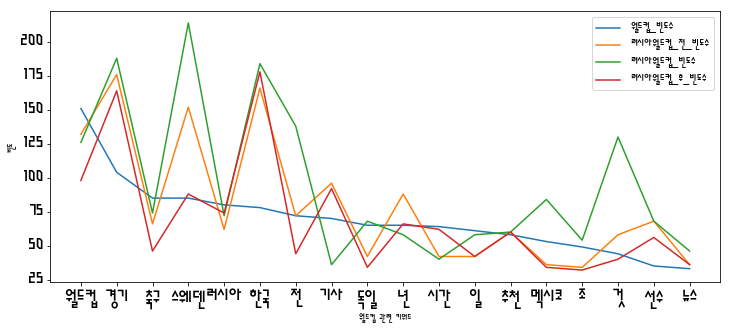

In [19]:
plt.rcParams["figure.figsize"] = (12,5)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(sum3.index,reverse=True)     
plt.plot(sorted(sum3.index,reverse=False), sum3['월드컵_빈도수'])
plt.plot(sorted(sum3.index,reverse=False), sum3['러시아월드컵_전_빈도수'])
plt.plot(sorted(sum3.index,reverse=False), sum3['러시아월드컵_빈도수'])
plt.plot(sorted(sum3.index,reverse=False), sum3['러시아월드컵_후_빈도수'])
plt.xticks(sorted(sum3.index,reverse=False), sum3.index)
plt.xlabel('월드컵 관련 키워드') 
plt.ylabel('빈도') 
plt.legend(loc='upper right',fontsize=12)
plt.show()

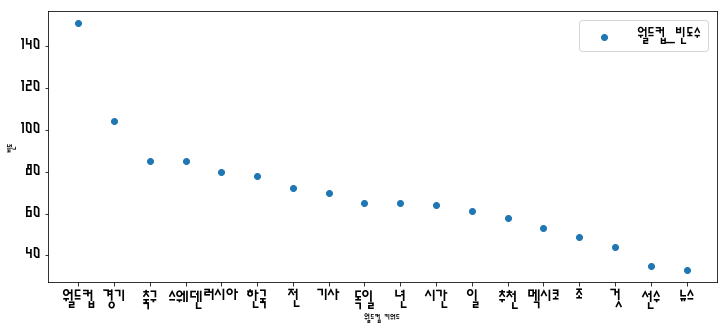

In [20]:
sorted(sum3.index,reverse=True)     
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
plt.scatter(sorted(sum3.index,reverse=False), sum3["월드컵_빈도수"])
plt.xticks(sorted(sum3.index,reverse=False), sum3.index)
plt.xlabel('월드컵 키워드') 
plt.ylabel('빈도') 
plt.legend(loc='upper right',fontsize=18)
plt.show()
# 월드컵 키워드 빈도 그래프(점형식)
# 그래프의 경우 나머지 키워드들도 동일하게 진행한다. 

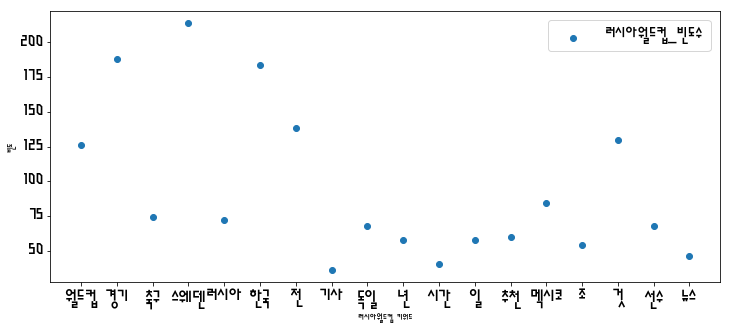

In [21]:
sorted(sum3.index,reverse=True)     
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
plt.scatter(sorted(sum3.index,reverse=False), sum3["러시아월드컵_빈도수"])
plt.xticks(sorted(sum3.index,reverse=False), sum3.index)
plt.xlabel('러시아월드컵 키워드') 
plt.ylabel('빈도') 
plt.legend(loc='upper right',fontsize=18)
plt.show()
# 월드컵 키워드 빈도 그래프(점형식)
# 그래프의 경우 나머지 키워드들도 동일하게 진행한다. 

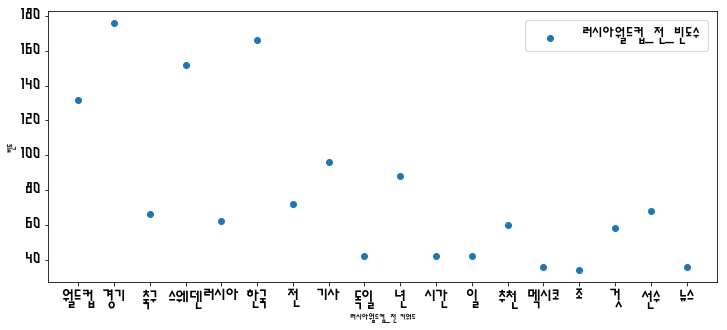

In [22]:
sorted(sum3.index,reverse=True)     
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
plt.scatter(sorted(sum3.index,reverse=False), sum3["러시아월드컵_전_빈도수"])
plt.xticks(sorted(sum3.index,reverse=False), sum3.index)
plt.xlabel('러시아월드컵_전 키워드') 
plt.ylabel('빈도') 
plt.legend(loc='upper right',fontsize=18)
plt.show()
# 월드컵 키워드 빈도 그래프(점형식)
# 그래프의 경우 나머지 키워드들도 동일하게 진행한다. 

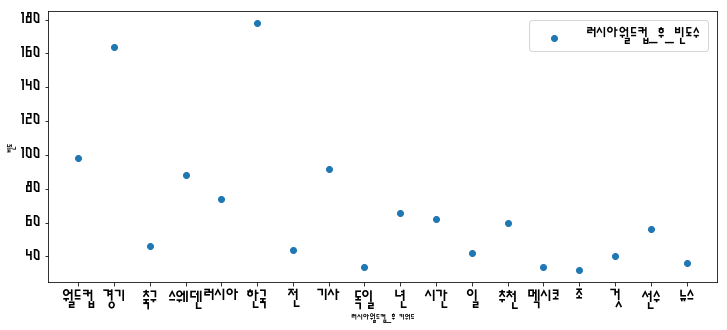

In [24]:
sorted(sum3.index,reverse=True)     
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
plt.scatter(sorted(sum3.index,reverse=False), sum3["러시아월드컵_후_빈도수"])
plt.xticks(sorted(sum3.index,reverse=False), sum3.index)
plt.xlabel('러시아월드컵_후 키워드') 
plt.ylabel('빈도') 
plt.legend(loc='upper right',fontsize=18)
plt.show()
# 월드컵 키워드 빈도 그래프(점형식)
# 그래프의 경우 나머지 키워드들도 동일하게 진행한다. 

In [25]:
import numpy as np
import math

In [52]:
title1 = pd.merge(world, R_worldB, how="inner",left_index=True,right_index=True)
title2 = pd.merge(sum1, R_world, how="inner",left_index=True,right_index=True)
title3 = pd.merge(sum2, R_worldA, how="inner",left_index=True,right_index=True)

Title = title3.corr(method='pearson')
print(Title)

               월드컵_빈도수  러시아월드컵_전_빈도수  러시아월드컵_빈도수  러시아월드컵_후_빈도수
월드컵_빈도수       1.000000      0.655437    0.468842      0.547955
러시아월드컵_전_빈도수  0.655437      1.000000    0.805925      0.907745
러시아월드컵_빈도수    0.468842      0.805925    1.000000      0.633714
러시아월드컵_후_빈도수  0.547955      0.907745    0.633714      1.000000


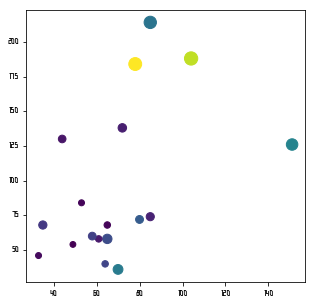

In [28]:
plt.figure(figsize  = (5,5))
plt.scatter(sum3['월드컵_빈도수'], sum3['러시아월드컵_빈도수'], sum3['러시아월드컵_전_빈도수'], sum3['러시아월드컵_후_빈도수'])

plt.show()